# Exploratory Data Analysis 

In [18]:
#Import basic packages
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

The continuous variable fnlwgt represents final weight, which is the number of units in the target population that the responding unit represents. The variable education_num stands for the number of years of education in total, which is a continuous representation of the discrete variable education. The variable relationship represents the responding unit’s role in the family.  capital_gain and capital_loss are income from investment sources other than wage/salary.

In [19]:
#file = '//Users//chung-tsengwang//Desktop//Github Repo//Census-Income-with-Tree-Based-Models//data//processed//processed.csv'
file = 'C:\\Users\\Chung-Tseng Wang\\Desktop\\Census-Income-with-Tree-Based-Models\\data\\processed\\processed.csv'
adult = pd.read_csv(file)
adult = adult.drop(['Unnamed: 0'], axis = 1)
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


In [20]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education-num     48842 non-null int64
marital-status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capitalgain       48842 non-null int64
capitalloss       48842 non-null int64
hoursperweek      48842 non-null int64
native-country    48842 non-null object
class             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## Correlation Matrix 

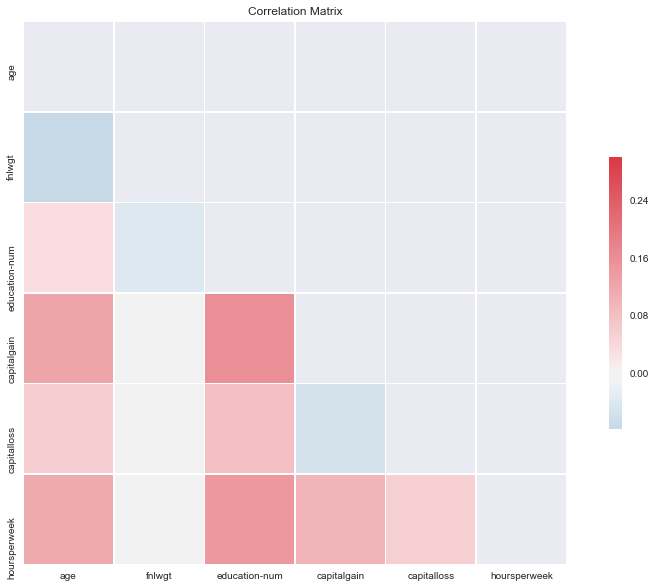

In [21]:
sns.set(style="dark")
corr = adult.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 10))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True,linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix')
plt.show()

## Univariant Non-Graphical EDA

In [22]:
#Tabulate Frequency of Occupation 
freq_occ = pd.DataFrame(adult.occupation.value_counts())
freq_occ = freq_occ.rename(columns = {'occupation':'Count'})
freq_occ['Proportion'] = freq_occ['Count']/freq_occ.Count.sum()
freq_occ['Percent'] = freq_occ.Proportion*100
freq_occ

,Count,Proportion,Percent
Craft-repair,8527,0.174583,17.458335
Prof-specialty,6172,0.126367,12.636665
Exec-managerial,6086,0.124606,12.460587
Adm-clerical,5611,0.114881,11.488064
Sales,5504,0.112690,11.268990
Other-service,4923,0.100794,10.079440
Machine-op-inspct,3416,0.069940,6.993981
Transport-moving,2355,0.048217,4.821670
Handlers-cleaners,2072,0.042423,4.242251
Farming-fishing,1490,0.030507,3.050653


In [23]:
#Tabulate Frequency of Race 
freq_race = pd.DataFrame(adult.race.value_counts())
freq_race = freq_race.rename(columns = {'race':'Count'})
freq_race['Proportion'] = freq_race['Count']/freq_race.Count.sum()
freq_race['Percent'] = freq_race.Proportion*100
freq_race

,Count,Proportion,Percent
White,41762,0.855043,85.504279
Black,4685,0.095922,9.592154
Asian-Pac-Islander,1519,0.031100,3.110028
Amer-Indian-Eskimo,470,0.009623,0.962287
Other,406,0.008313,0.831252


In [24]:
#Tabulate Frequency of Occupation 
freq_edu = pd.DataFrame(adult.education.value_counts())
freq_edu = freq_edu.rename(columns = {'education':'Count'})
freq_edu['Proportion'] = freq_edu['Count']/freq_edu.Count.sum()
freq_edu['Percent'] = freq_edu.Proportion*100
freq_edu

,Count,Proportion,Percent
HS-grad,15784,0.323164,32.316449
Some-college,10878,0.222718,22.271815
Bachelors,8025,0.164305,16.430531
Masters,2657,0.054400,5.439990
Assoc-voc,2061,0.042197,4.219729
11th,1812,0.037099,3.709922
Assoc-acdm,1601,0.032779,3.277917
10th,1389,0.028439,2.843864
7th-8th,955,0.019553,1.955284
Prof-school,834,0.017075,1.707547


In [26]:
#Tabulate Frequency of Workclass
freq_wc = pd.DataFrame(adult.workclass.value_counts())
freq_wc = freq_wc.rename(columns = {'workclass':'Count'})
freq_wc['Proportion'] = freq_wc['Count']/freq_wc.Count.sum()
freq_wc['Percent'] = freq_wc.Proportion*100
freq_wc

,Count,Proportion,Percent
Private,36705,0.751505,75.150485
Self-emp-not-inc,3862,0.079071,7.907129
Local-gov,3136,0.064207,6.420703
State-gov,1981,0.040559,4.055935
Self-emp-inc,1695,0.034704,3.470374
Federal-gov,1432,0.029319,2.931903
Without-pay,21,0.000430,0.042996
Never-worked,10,0.000205,0.020474


## Graphical EDA

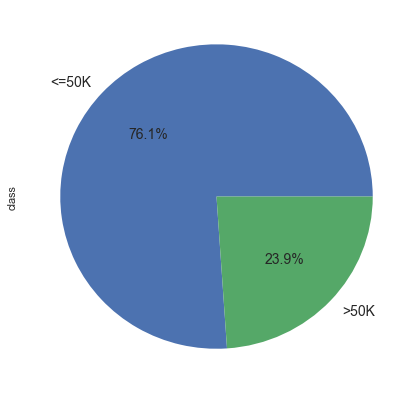

In [27]:
#Class Breakdown 
plt.figure(figsize=(7,7))
adult['class'].value_counts().plot(kind = 'pie',autopct='%1.1f%%', fontsize = 14)

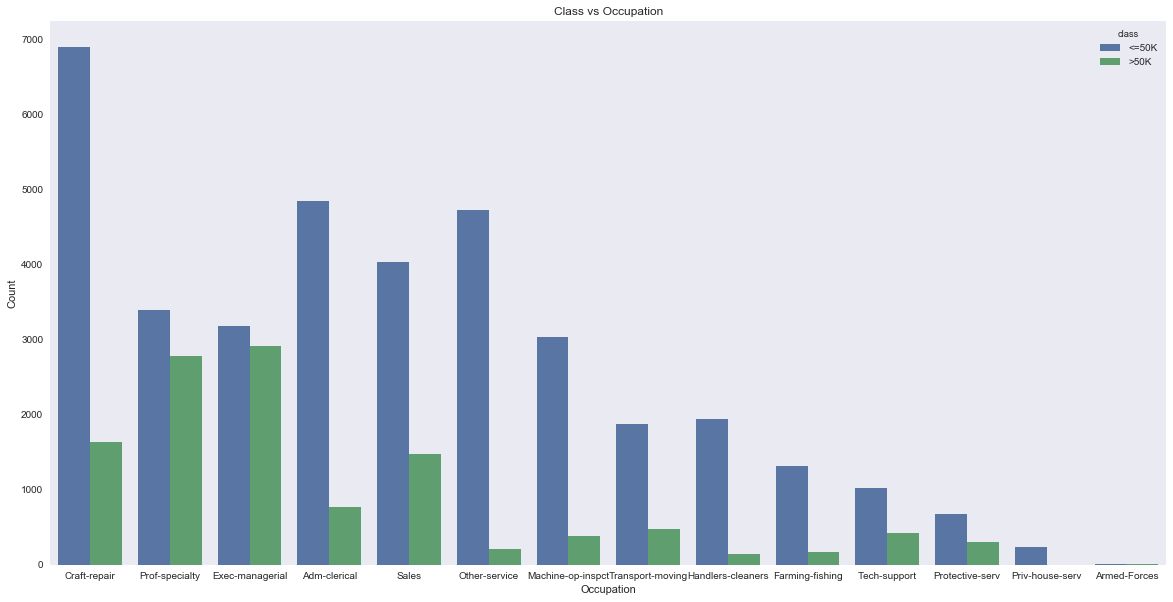

In [28]:
#Class vs Occupation
fig, ax = plt.subplots(figsize=(20,10))
plt.title('Class vs Occupation')
sns.countplot(x = adult['occupation'], data=adult, hue = 'class',order = adult['occupation'].value_counts().index)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

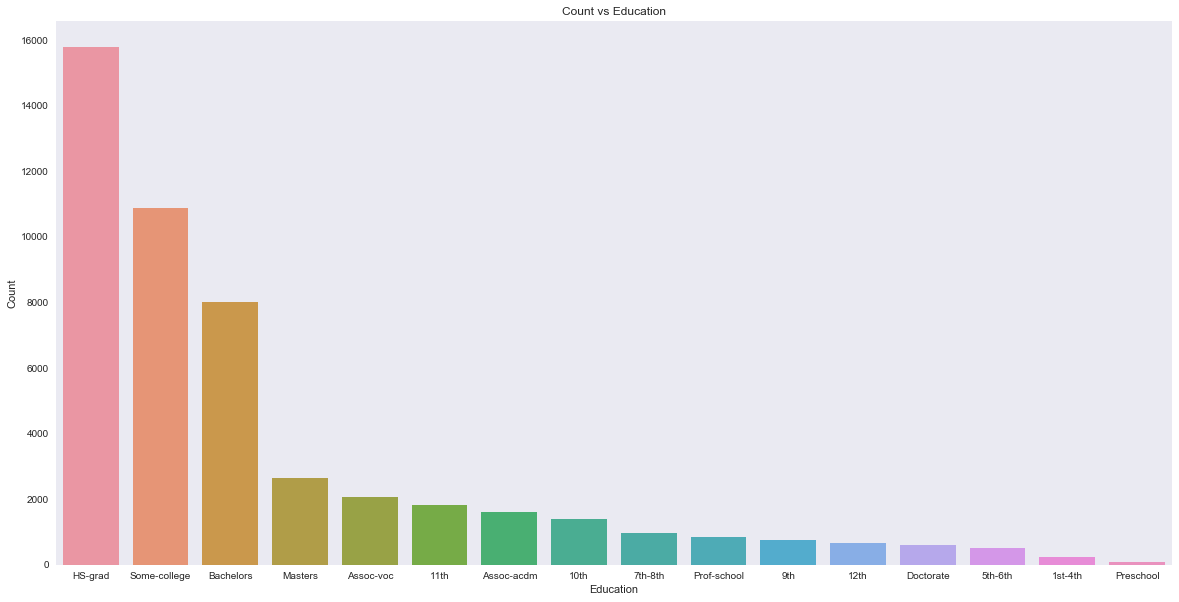

In [29]:
#Education
fig, ax = plt.subplots(figsize=(20,10))
plt.title('Count vs Education')
sns.countplot(x = adult['education'], data=adult,order = adult['education'].value_counts().index)
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

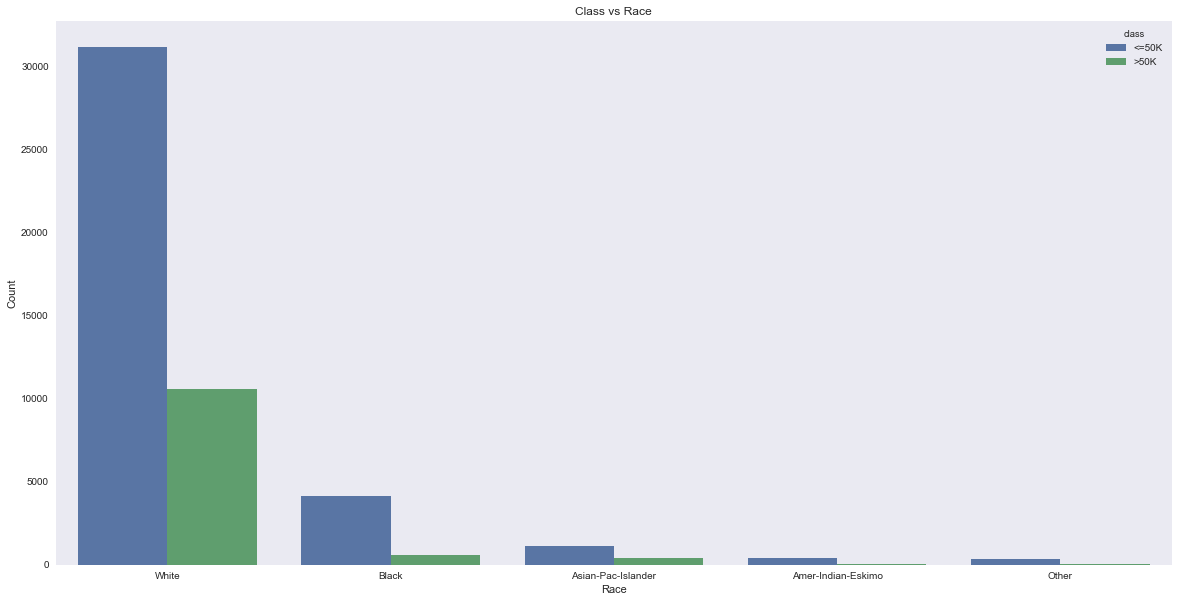

In [30]:
#Class vs Sex
fig, ax = plt.subplots(figsize=(20,10))
plt.title('Class vs Race')
sns.countplot(x = adult['race'], data=adult, hue = 'class',order = adult['race'].value_counts().index)
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

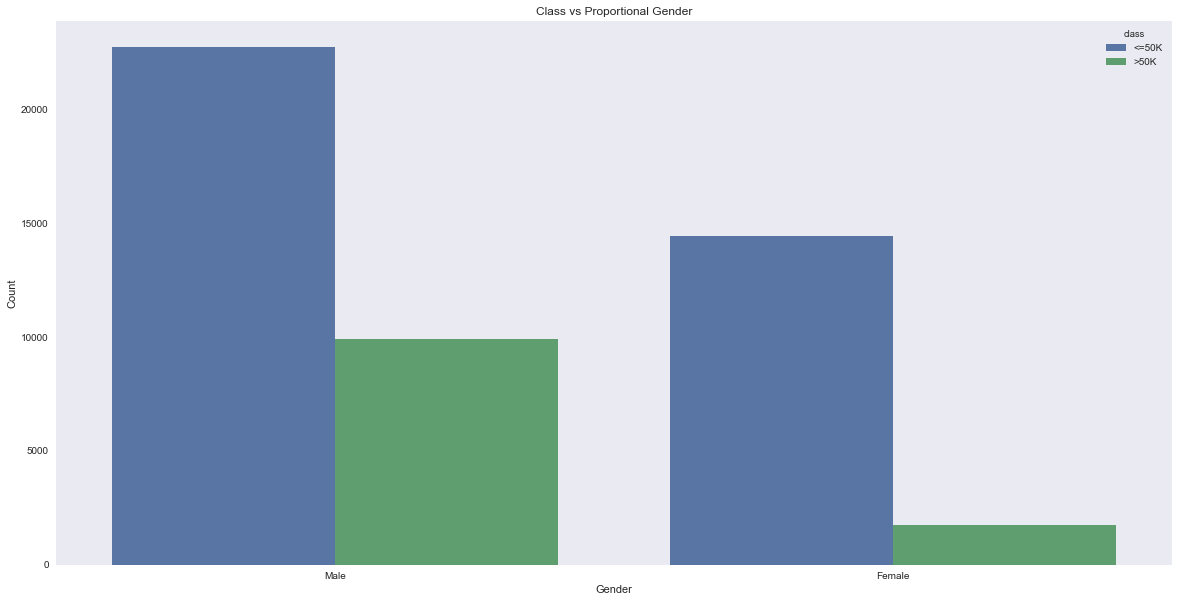

In [31]:
#Class vs Gender
fig, ax = plt.subplots(figsize=(20,10))
plt.title('Class vs Proportional Gender')
sns.countplot(x = adult['sex'], data=adult, hue = 'class',order = adult['sex'].value_counts().index)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()